In [2]:
import os
import sys

print("at directory:", os.getcwd())
print("changing to root directory")
os.chdir("..")
print("at directory:", os.getcwd())

at directory: /Users/wilka/git/research/multitask_preplay/figures
changing to root directory
at directory: /Users/wilka/git/research/multitask_preplay


In [3]:
sys.path.append("simulations")

In [4]:
from analysis import vis_utils
from data_processing import utils_jaxmaze as utils
from figures.jaxmaze_overlap_analysis import (
  visualize_model_overlap,
  compute_overlap_df,
  visualize_user_overlap,
)

No file specified for image dict.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/image_data.pkl


# Human Overlap

In [15]:
from data_processing import process_user_data

user_df = process_user_data.get_jaxmaze_human_data(
  overwrite_episode_df=True,
  load_df_only=False,
  debug=False,
)

No file specified for image dict.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/image_data.pkl
GENERATING /Users/wilka/git/research/preplay_results/data_jaxmaze/final/human_data_episode_df.csv
LOADING /Users/wilka/git/research/preplay_results/data_jaxmaze/final/human_data_episodes.safetensor


/Users/wilka/git/research/multitask_preplay/data_processing/process_user_data.py:371: RuntimeWarning: invalid value encountered in log
  return np.log(1000 * e.reaction_times + 1e-5)
Processing reuse per user: 100%|██████████████████████████████████████████████████████| 593/593 [00:33<00:00, 17.67it/s]


In [16]:
user_df.head()

index,domain,maze,world_seed,block_name,condition,name,block,manipulation,episode_idx,eval,task,room,start_pos,tell_reuse,reversal,user_id,age,sex,worker_id,hit_id,assignment_id,git_version,user,debug,exp_name,global_episode_idx,success,path_length,termination,first_rt,first_log_rt,avg_rt,avg_log_rt,total_rt,total_log_rt,avg_post_rt,avg_log_post_rt,max_rt,max_log_rt,final_rt,final_log_rt,reaction_times,eval_shares_start_pos,train_success_count,min_train_success,reuse,overlap
u32,str,str,str,str,i64,str,str,i64,i64,bool,i64,i64,str,i64,str,i64,i64,str,str,str,str,str,str,str,str,i64,f32,i64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,str,bool,f32,bool,i32,f64
0,"""jaxmaze""","""big_m1_maze3_(F,F)""","""big_m1_maze3""","""[False, False]""",0,"""big_m1_maze3__(F,F)_eval1""","""shortcut""",1,1,false,31,0,"""[ 4 16]""",1,"""[False, False]""",2551730852,45,"""Male""","""A34930YXVQ8SUT""","""3MIVREZQVHKZTQVKS43DYZZEP3BKQD""","""3OUYGIZWR8KE28LVF0J84TQOJOY0P9""","""git_version_unknown""","""2551730852""","""0""","""jaxmaze""",0,1.0,34,1.0,1.523,7.328437,0.264118,5.453022,8.98,185.402756,0.22597,5.396191,1.523,7.328437,1.52,7.326466,"""[1.523 0.256 0.24 0.288 0.224…",true,16.0,true,-1,NaN
1,"""jaxmaze""","""big_m1_maze3_(F,F)""","""big_m1_maze3""","""[False, False]""",0,"""big_m1_maze3__(F,F)_eval1""","""shortcut""",1,2,false,31,0,"""[14 0]""",1,"""[False, False]""",2551730852,45,"""Male""","""A34930YXVQ8SUT""","""3MIVREZQVHKZTQVKS43DYZZEP3BKQD""","""3OUYGIZWR8KE28LVF0J84TQOJOY0P9""","""git_version_unknown""","""2551730852""","""0""","""jaxmaze""",1,1.0,60,1.0,1.437,7.270313,0.252217,5.449865,15.133,326.991913,0.232136,5.419011,1.437,7.270313,1.312,7.179308,"""[1.437 0.208 0.24 0.32 0.176…",true,16.0,true,-1,NaN
2,"""jaxmaze""","""big_m1_maze3_(F,F)""","""big_m1_maze3""","""[False, False]""",0,"""big_m1_maze3__(F,F)_eval1""","""shortcut""",1,3,false,31,0,"""[ 6 23]""",1,"""[False, False]""",2551730852,45,"""Male""","""A34930YXVQ8SUT""","""3MIVREZQVHKZTQVKS43DYZZEP3BKQD""","""3OUYGIZWR8KE28LVF0J84TQOJOY0P9""","""git_version_unknown""","""2551730852""","""0""","""jaxmaze""",2,1.0,5,1.0,1.319,7.184629,0.411,5.589056,2.055,27.945278,0.184,5.190162,1.319,7.184629,1.216,7.103322,"""[1.319 0.16 0.144 0.176 0.256…",true,16.0,true,-1,NaN
3,"""jaxmaze""","""big_m1_maze3_(F,F)""","""big_m1_maze3""","""[False, False]""",0,"""big_m1_maze3__(F,F)_eval1""","""shortcut""",1,4,false,31,0,"""[ 2 20]""",1,"""[False, False]""",2551730852,45,"""Male""","""A34930YXVQ8SUT""","""3MIVREZQVHKZTQVKS43DYZZEP3BKQD""","""3OUYGIZWR8KE28LVF0J84TQOJOY0P9""","""git_version_unknown""","""2551730852""","""0""","""jaxmaze""",3,1.0,8,1.0,0.895,6.796824,0.291875,5.479227,2.335,43.833817,0.205714,5.290999,0.895,6.796824,1.136,7.035269,"""[0.895 0.176 0.208 0.16 0.16 …",true,16.0,true,-1,NaN
4,"""jaxmaze""","""big_m1_maze3_(F,F)""","""big_m1_maze3""","""[False, False]""",0,"""big_m1_maze3__(F,F)_eval1""","""shortcut""",1,5,false,29,1,"""[6 9]""",1,"""[False, False]""",2551730852,45,"""Male""","""A34930YXVQ8SUT""","""3MIVREZQVHKZTQVKS43DYZZEP3BKQD""","""3OUYGIZWR8KE28LVF0J84TQOJOY0P9""","""git_version_unknown""","""2551730852""","""0""","""jaxmaze""",4,1.0,14,1.0,0.957,6.863803,0.309714,5.609228,4.336,78.52919,0.259923,5.512722,0.957,6.863803,1.485,7.30317,"""[0.957 0.208 0.288 0.448 0.352…",true,16.0,true,-1,NaN


In [17]:
len(user_df["global_episode_idx"].unique())

43870

In [18]:
shortcut_df = user_df.filter(manipulation=1)
shortcut_df.filter(eval=True)

index,domain,maze,world_seed,block_name,condition,name,block,manipulation,episode_idx,eval,task,room,start_pos,tell_reuse,reversal,user_id,age,sex,worker_id,hit_id,assignment_id,git_version,user,debug,exp_name,global_episode_idx,success,path_length,termination,first_rt,first_log_rt,avg_rt,avg_log_rt,total_rt,total_log_rt,avg_post_rt,avg_log_post_rt,max_rt,max_log_rt,final_rt,final_log_rt,reaction_times,eval_shares_start_pos,train_success_count,min_train_success,reuse,overlap
u32,str,str,str,str,i64,str,str,i64,i64,bool,i64,i64,str,i64,str,i64,i64,str,str,str,str,str,str,str,str,i64,f32,i64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,str,bool,f32,bool,i32,f64
0,"""jaxmaze""","""big_m1_maze3_shortcut_(F,F)""","""big_m1_maze3_shortcut""","""[False, False]""",1,"""big_m1_maze3_shortcut__(F,F)_t…","""shortcut""",1,1,true,46,0,"""[14 0]""",1,"""[False, False]""",2551730852,45,"""Male""","""A34930YXVQ8SUT""","""3MIVREZQVHKZTQVKS43DYZZEP3BKQD""","""3OUYGIZWR8KE28LVF0J84TQOJOY0P9""","""git_version_unknown""","""2551730852""","""0""","""jaxmaze""",16,1.0,56,1.0,1.848,7.521859,0.247857,5.397523,13.88,302.261292,0.218764,5.3589,1.848,7.521859,0.0,-11.512925,"""[1.848 0.208 0.32 0.192 0.352…",true,16.0,true,0,0.122807
1,"""jaxmaze""","""big_m1_maze3_shortcut_(F,T)""","""big_m1_maze3_shortcut""","""[False, True]""",1,"""big_m1_maze3_shortcut__(F,T)_t…","""shortcut""",1,1,true,31,0,"""[3 0]""",1,"""[False, True]""",2551730852,45,"""Male""","""A34930YXVQ8SUT""","""3MIVREZQVHKZTQVKS43DYZZEP3BKQD""","""3OUYGIZWR8KE28LVF0J84TQOJOY0P9""","""git_version_unknown""","""2551730852""","""0""","""jaxmaze""",33,1.0,61,1.0,1.039,6.946014,0.254934,5.441497,15.551,331.931305,0.241867,5.416421,1.039,6.946014,0.0,-11.512925,"""[1.039 0.208 0.448 0.88 0.736…",true,16.0,true,1,0.929825
2,"""jaxmaze""","""big_m1_maze3_shortcut_(T,T)""","""big_m1_maze3_shortcut""","""[True, True]""",1,"""big_m1_maze3_shortcut__(T,T)_t…","""shortcut""",1,1,true,29,0,"""[ 3 25]""",1,"""[True, True]""",2551730852,45,"""Male""","""A34930YXVQ8SUT""","""3MIVREZQVHKZTQVKS43DYZZEP3BKQD""","""3OUYGIZWR8KE28LVF0J84TQOJOY0P9""","""git_version_unknown""","""2551730852""","""0""","""jaxmaze""",50,1.0,55,1.0,0.977,6.884487,0.238273,5.404515,13.105,297.248352,0.224593,5.377109,0.977,6.884487,0.0,-11.512925,"""[0.977 0.224 0.208 0.656 0.208…",true,16.0,true,-1,NaN
3,"""jaxmaze""","""big_m1_maze3_shortcut_(T,F)""","""big_m1_maze3_shortcut""","""[True, False]""",1,"""big_m1_maze3_shortcut__(T,F)_t…","""shortcut""",1,1,true,29,0,"""[14 25]""",1,"""[True, False]""",2551730852,45,"""Male""","""A34930YXVQ8SUT""","""3MIVREZQVHKZTQVKS43DYZZEP3BKQD""","""3OUYGIZWR8KE28LVF0J84TQOJOY0P9""","""git_version_unknown""","""2551730852""","""0""","""jaxmaze""",67,1.0,60,1.0,0.936,6.841616,0.219533,5.324068,13.172001,319.444061,0.20739,5.298346,0.936,6.841616,0.0,-11.512925,"""[0.936 0.16 0.145 0.225 0.192…",true,16.0,true,1,0.929825
4,"""jaxmaze""","""big_m1_maze3_shortcut_(T,T)""","""big_m1_maze3_shortcut""","""[True, True]""",1,"""big_m1_maze3_shortcut__(T,T)_t…","""shortcut""",1,1,true,13,0,"""[ 3 25]""",1,"""[True, True]""",3761043368,33,"""Male""","""AJZRDVBZ6TKGH""","""3MJ9GGZYO3SCPUKDE20N83YF4KZ2AW""","""3SKRO2GZ72DDY69XYRI0MHNZUMN1KX""","""git_version_unknown""","""3761043368""","""0""","""jaxmaze""",226,1.0,109,1.0,2.99,8.003029,0.40367,5.533298,44.0,603.129456,0.379722,5.51043,5.245,8.56503,0.0,-11.512925,"""[2.99 0.592 1.066 0.399 0.63 …",true,16.0,true,1,0.949153
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
415,"""jaxmaze""","""big_m1_maze3_shortcut_(F,F)""","""big_m1_maze3_shortcut""","""[False, False]""",1,"""big_m1_maze3_shortcut__(F,F)_t…","""shortcut""",1,1,true,31,0,"""[14 0]""",1,"""[False, False]""",3190803247,42,"""Male""","""A1Q0WMGOMYOLPN""","""3G4VVJO6PZ2ETEU5SROOYU94K7PKPM""","""3KRVW3HTZO78IE8UWMA0XV2C96UMS0""","""git_version_unknown""","""3190803247""","""0""","""jaxmaze""",43417,1.0,55,1.0,0.726,6.58755,0.877291,6.70154,48.251

No episodes for user 18824410
Making plot for user 54971111
n episodes 2 1
path lengths 57 57
Making plot for user 77637731
n episodes 1 1
path lengths 57 57
Making plot for user 145383710
n episodes 1 1
path lengths 57 57
Saved figure to /Users/wilka/git/research/preplay_results/figures/jaxmaze_overlap_reuse/human_overlap.pdf


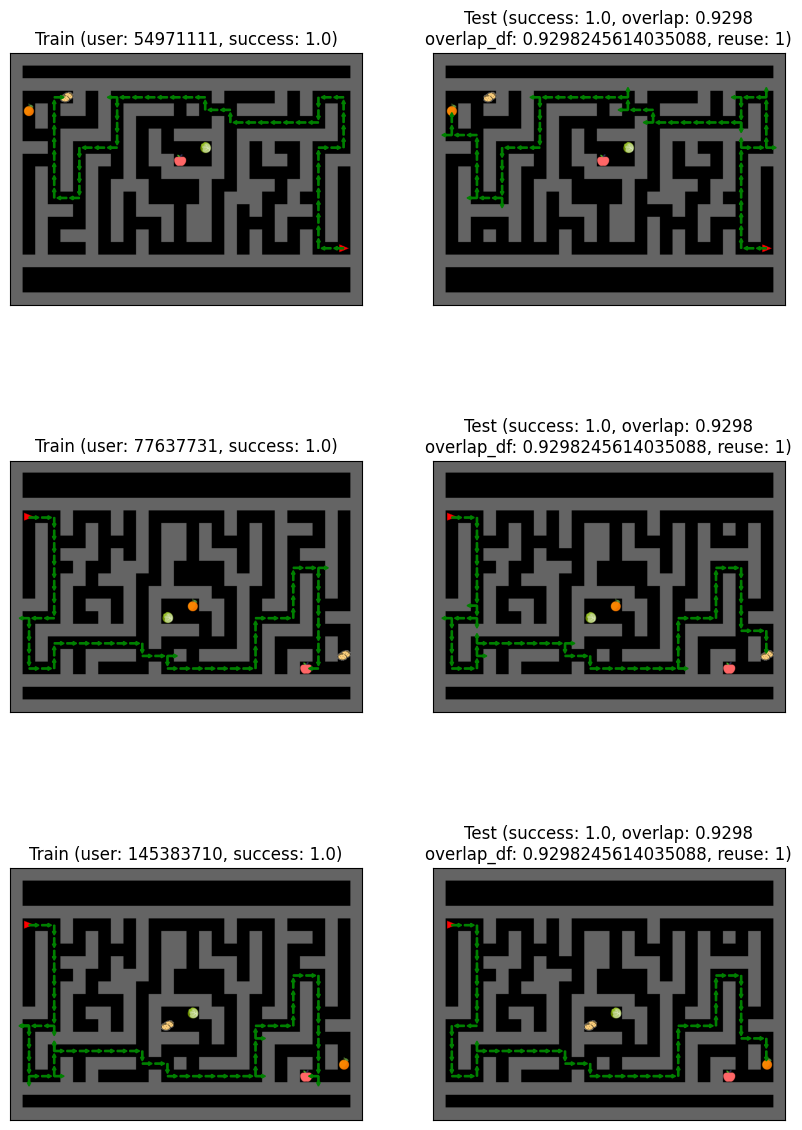

In [19]:
# %debug
fig, train, test = visualize_user_overlap(shortcut_df, n=3)
fig

In [55]:
train

index,domain,maze,world_seed,block_name,condition,name,block,manipulation,episode_idx,eval,task,room,start_pos,tell_reuse,reversal,user_id,age,sex,worker_id,hit_id,assignment_id,git_version,user,debug,exp_name,global_episode_idx,success,path_length,termination,first_rt,first_log_rt,avg_rt,avg_log_rt,total_rt,total_log_rt,avg_post_rt,avg_log_post_rt,max_rt,max_log_rt,final_rt,final_log_rt,reaction_times
u32,str,str,str,str,i64,str,str,i64,i64,bool,i64,i64,str,i64,str,i64,i64,str,str,str,str,str,str,str,str,i64,f32,i64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,str
0,"""jaxmaze""","""big_m1_maze3_(F,T)""","""big_m1_maze3""","""[False, True]""",0,"""big_m1_maze3__(F,T)_eval1""","""shortcut""",1,9,false,31,0,"""[3 0]""",1,"""[False, True]""",145383710,31,"""Female""","""A2MFMT2FIYVQSN""","""391JB9X4ZYU88BXS0BWWHQF9F2EKMQ""","""3R8YZBNQ9I4DKVMU0CJ6JDQLWTG7QN""","""git_version_unknown""","""145383710""","""0""","""jaxmaze""",28627,1.0,71,1.0,0.499,6.212606,0.196211,4.995022,13.931002,354.646545,0.191886,4.977628,0.554,6.317165,0.147,4.990433,"""[0.499 0.272 0.316 0.492 0.062…"


593
77637731
Saved figure to /Users/wilka/git/research/preplay_results/figures/jaxmaze_overlap_reuse/shortcut/human_model_overlap.pdf


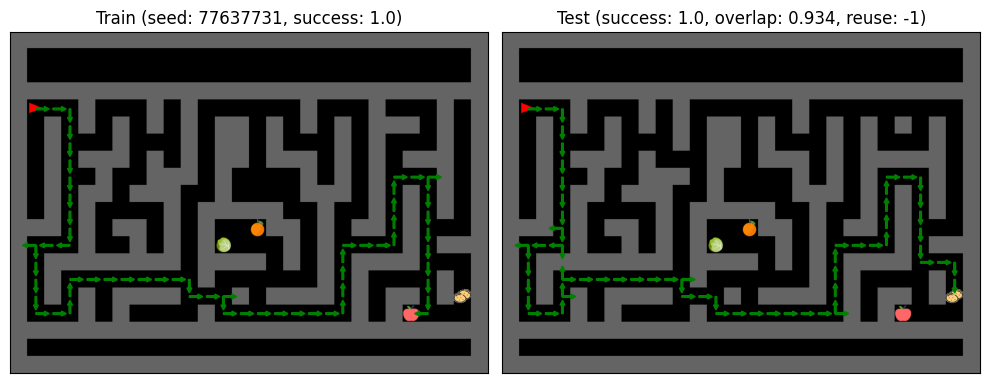

In [16]:
# visualize shortcut overlap
shortcut_df = user_df.filter(manipulation=1)
# visualize_user_overlap(shortcut_df, n=1)
print(len(user_df["user_id"].unique()))
user_id = shortcut_df["user_id"].unique().to_list()[2]
print(user_id)
test = shortcut_df.filter(eval=True, user_id=user_id, eval_shares_start_pos=True)
# test.head()
filters = dict(
  start_pos=test["start_pos"].to_list()[0],
  block_name=test["block_name"].to_list()[0],
  user_id=test["user_id"].to_list()[0],
  room=test["room"].to_list()[0],
)
# print(filters)
test = shortcut_df.filter(eval=True, manipulation=1, **filters)
train = shortcut_df.filter(eval=False, manipulation=1, success=1, **filters)

visualize_model_overlap(train, test, "shortcut/human", key="user_id")

In [233]:
train

index,domain,maze,world_seed,block_name,condition,name,block,manipulation,global_episode_idx,episode_idx,eval,task,room,start_pos,tell_reuse,reversal,user_id,age,sex,worker_id,hit_id,assignment_id,git_version,user,debug,exp_name,success,path_length,termination,first_rt,first_log_rt,avg_rt,avg_log_rt,total_rt,total_log_rt,avg_post_rt,avg_log_post_rt,max_rt,max_log_rt,final_rt,final_log_rt,reaction_times,eval_shares_start_pos,train_success_count,min_train_success,reuse,overlap
u32,str,str,str,str,i64,str,str,i64,i64,i64,bool,i64,i64,str,i64,str,i64,i64,str,str,str,str,str,str,str,str,f32,i64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,str,bool,f32,bool,i32,f64
0,"""jaxmaze""","""big_m1_maze3_(F,T)""","""big_m1_maze3""","""[False, True]""",0,"""big_m1_maze3__(F,T)_eval1""","""shortcut""",1,38281,14,false,31,0,"""[3 0]""",1,"""[False, True]""",77637731,49,"""Male""","""A41KVOC1C3L3B""","""373L46LKP7SI73R7XEJ41YNSB8JKJM""","""33FOTY3KEN7VF8X96E12YYARPU3C1I""","""git_version_unknown""","""77637731""","""0""","""jaxmaze""",1.0,63,1.0,3.123,8.04655,0.286889,5.459761,18.073997,343.964966,0.241145,5.418039,3.123,8.04655,0.24,5.480639,"""[3.123 0.213 0.441 0.187 0.167…",true,16.0,true,-1,null


In [232]:
test

index,domain,maze,world_seed,block_name,condition,name,block,manipulation,global_episode_idx,episode_idx,eval,task,room,start_pos,tell_reuse,reversal,user_id,age,sex,worker_id,hit_id,assignment_id,git_version,user,debug,exp_name,success,path_length,termination,first_rt,first_log_rt,avg_rt,avg_log_rt,total_rt,total_log_rt,avg_post_rt,avg_log_post_rt,max_rt,max_log_rt,final_rt,final_log_rt,reaction_times,eval_shares_start_pos,train_success_count,min_train_success,reuse,overlap
u32,str,str,str,str,i64,str,str,i64,i64,i64,bool,i64,i64,str,i64,str,i64,i64,str,str,str,str,str,str,str,str,f32,i64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,str,bool,f32,bool,i32,f64
0,"""jaxmaze""","""big_m1_maze3_shortcut_(F,T)""","""big_m1_maze3_shortcut""","""[False, True]""",1,"""big_m1_maze3_shortcut__(F,T)_t…","""shortcut""",1,38285,1,true,13,0,"""[3 0]""",1,"""[False, True]""",77637731,49,"""Male""","""A41KVOC1C3L3B""","""373L46LKP7SI73R7XEJ41YNSB8JKJM""","""33FOTY3KEN7VF8X96E12YYARPU3C1I""","""git_version_unknown""","""77637731""","""0""","""jaxmaze""",1.0,67,1.0,2.046,7.623642,0.261388,5.41389,17.512999,362.730621,0.234348,5.380409,2.046,7.623642,0.0,-11.512925,"""[2.046 0.167 0.386 0.546 0.16 …",true,16.0,true,-1,null


In [243]:
overlap = compute_overlap_df(train, test)
overlap.sum(), overlap.mean()

1 1
57 57


(53, 0.9298245614035088)

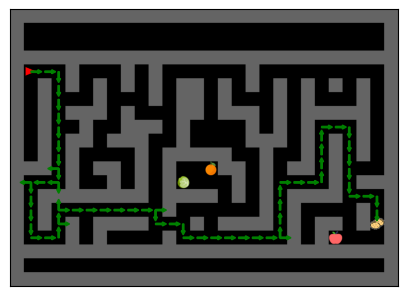

In [241]:
vis_utils.render_path(test.episodes[0])

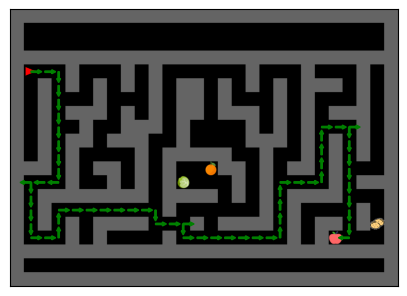

In [242]:
vis_utils.render_path(train.episodes[0])
# vis_utils.render_path(train.episodes[1])
# vis_utils.render_path(train.episodes[2])

In [ ]:
# visualize two_paths overlap
train = user_df.filter(eval=False, manipulation=3, eval_shares_start_pos=True)
filters = dict(
  start_pos=test["start_pos"].to_list()[0],
  block_name=test["block_name"].to_list()[0],
  # user_id=test['user_id'].to_list()[0],
  room=test["room"].to_list()[0],
)
test = user_df.filter(eval=True, manipulation=3)

visualize_model_overlap(train, test, "two_paths/human", key="user_id")

# Model Overlap

In [138]:
from data_processing import process_model_data


model_df = process_model_data.get_jaxmaze_model_data(
  overwrite_episode_data=True,
  overwrite_episode_df=True,
  load_df_only=False,
  models=["preplay", "dyna", "usfa", "bfs"],
  debug=False,
)

No file specified for groups.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/human_dyna/list_of_groups.npy
No file specified for groups.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/human_dyna/list_of_groups.npy
No file specified for groups.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/human_dyna/list_of_groups.npy
No file specified for groups.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/human_dyna/list_of_groups.npy
No file specified for groups.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/human_dyna/list_of_groups.npy
No file specified for groups.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/human_dyna/list_of_groups.npy


KeyboardInterrupt: 

In [133]:
model_df.filter(eval=True, manipulation=1, maze="big_m1_maze3_shortcut").head()
# model_df.filter(eval=False, manipulation=1, maze='big_m1_maze3')

index,domain,algo,block_name,condition,eval,start_pos,manipulation,task,task_set,room,total_reward,success,path_length,seed,user_id,maze,task_vector,global_episode_idx,reuse,overlap
u32,str,str,null,i64,bool,str,i64,i64,i64,i64,f64,f64,i64,i64,i64,str,str,i64,i32,f64
0,"""jaxmaze""","""dfs""",null,0,true,"""[14 0]""",1,40,0,0,1.0,1.0,61,42,42,"""big_m1_maze3_shortcut""","""[0 1 0 0]""",100,0,null
1,"""jaxmaze""","""dfs""",null,0,true,"""[14 0]""",1,40,0,0,1.0,1.0,107,42,42,"""big_m1_maze3_shortcut""","""[0 1 0 0]""",101,1,null
2,"""jaxmaze""","""dfs""",null,0,true,"""[14 0]""",1,40,0,0,1.0,1.0,77,42,42,"""big_m1_maze3_shortcut""","""[0 1 0 0]""",102,1,null
3,"""jaxmaze""","""dfs""",null,0,true,"""[14 0]""",1,40,0,0,1.0,1.0,77,42,42,"""big_m1_maze3_shortcut""","""[0 1 0 0]""",103,0,null
4,"""jaxmaze""","""dfs""",null,0,true,"""[14 0]""",1,40,0,0,1.0,1.0,77,42,42,"""big_m1_maze3_shortcut""","""[0 1 0 0]""",104,0,null


In [134]:
# for seed in range(1,11):
#     print(seed)
#     vis_utils.render_path(model_df.filter(eval=False, manipulation=1, maze='big_m1_maze3', seed=seed).episodes[0])

In [137]:
seed = None
train = model_df.filter(eval=False, manipulation=1, maze="big_m1_maze3", seed=seed)
test = model_df.filter(
  eval=True, manipulation=1, maze="big_m1_maze3_shortcut", seed=seed
)
visualize_model_overlap(train, test, f"shortcut_dfs", seeds=None)

/Users/wilka/git/research/human-dyna-web/libraries/nicewebrl/nicewebrl/dataframe.py:91: UserWarning: Comparisons with None always result in null. Consider using `.is_null()` or `.is_not_null()`.
  df = self._df.filter(*args, **kwargs)


Saved figure to /Users/wilka/git/research/preplay_results/figures/jaxmaze_model_overap/shortcut_dfs_model_overlap.pdf


In [121]:
train_map = utils.create_maps(train.filter(seed=seed).episodes[:1]).sum(0)
test_map = utils.create_maps(test.filter(seed=seed).episodes[:1]).sum(0)
overlap = utils.compute_overlap(train_map, test_map)
overlap.mean()

0.6

In [109]:
train.head()

index,domain,algo,block_name,condition,eval,start_pos,manipulation,task,task_set,room,total_reward,success,path_length,seed,user_id,maze,task_vector,global_episode_idx,reuse,overlap
u32,str,str,null,i64,bool,str,i64,i64,i64,i64,f64,f64,i64,i64,i64,str,str,i64,i32,f64
0,"""jaxmaze""","""qlearning""",null,0,false,"""[14 0]""",1,26,0,0,1.0,1.0,73,8,8,"""big_m1_maze3""","""[1 0 0 0]""",14,-1,null


In [110]:
train.episodes[0].timesteps.reward

Array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],      dtype=float32, weak_type=True)

In [111]:
from data_processing import process_model_data

in_episode = process_model_data.get_in_episode(train.episodes[0].timesteps)
rewards = train.episodes[0].timesteps.reward[in_episode]
rewards

Array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],      dtype=float32, weak_type=True)

In [112]:
success = rewards > 0.5
success

Array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,